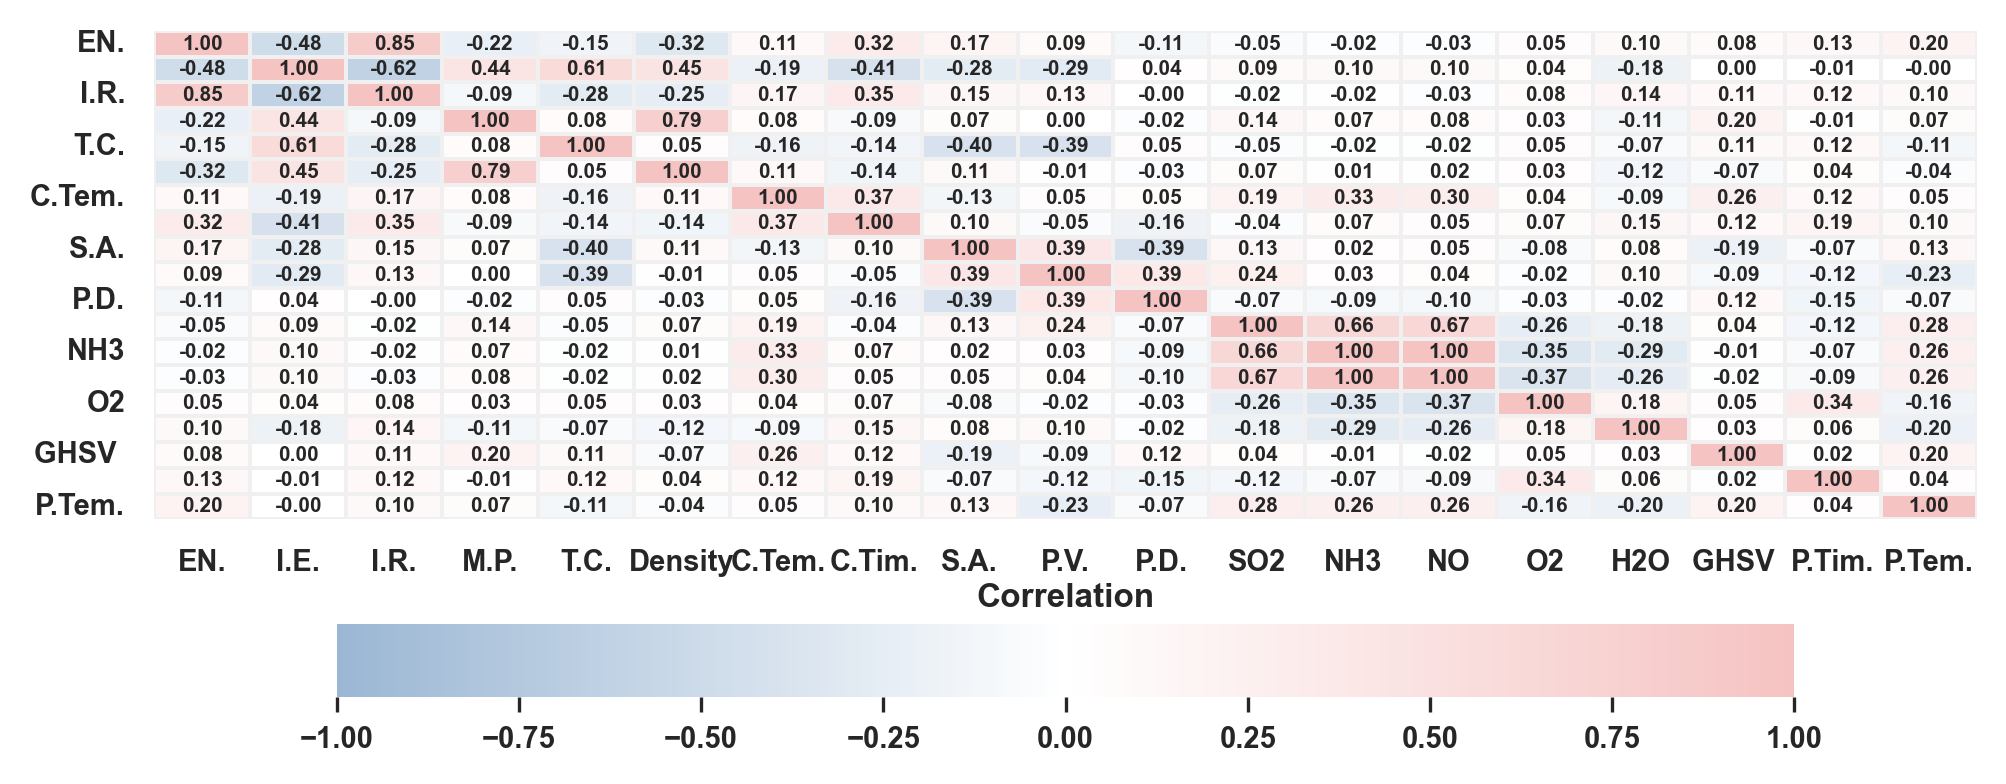

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

# 1. 读取Excel数据
df = pd.read_excel('归一化数据-20251120 -去除催化剂.xlsx')  # 替换为您的文件路径

# 2. 计算PCC相关系数矩阵
corr_matrix = df.corr(method='pearson')

# 3. 自定义蓝-白-粉渐变（低饱和度莫兰迪色）
colors = ["#9BB7D4", "#FFFFFF", "#F5C3C2"]  # 浅蓝 -> 白 -> 浅粉
cmap = LinearSegmentedColormap.from_list("blue_white_pink", colors)

# 4. 设置绘图风格
sns.set_style("whitegrid")  # 白色背景+网格线
plt.rcParams.update({
    'font.family': 'Arial',      # 字体类型
    'font.weight': 'bold',       # 加粗
    'axes.labelweight': 'bold',  # 坐标轴加粗
    'axes.titleweight': 'bold'   # 标题加粗
})

# 5. 创建热力图 - 增加横向长度
plt.figure(figsize=(6.8, 3), dpi=300)  # 增加横向长度，使标签有足够空间水平放置

heatmap = sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",        # 显示两位小数
    cmap=cmap,
    center=0,         # 白色对应0值
    vmin=-1,          # 最小值-1
    vmax=1,           # 最大值1
    linewidths=0.5,   # 单元格间隔线
    linecolor='#F0F0F0',  # 浅灰色间隔线
    cbar_kws={"shrink": 0.8, "label": "Correlation", "orientation": "horizontal"}  # 添加水平方向参数
)

# 6. 美化图形
plt.title('', fontsize=16, pad=20)

# 设置横纵坐标字体大小 - 调整x轴标签旋转角度为0（水平放置）
plt.xticks(fontsize=7, rotation=0, ha='center')  # x轴标签水平放置
plt.yticks(fontsize=7, rotation=0)  # y轴标签保持不变

# 设置热力图中相关性数值的字体大小和加粗
for text in heatmap.texts:
    text.set_size(5)  # 设置字体大小
    text.set_weight('bold')  # 设置为粗体

# 调整颜色条位置和样式
cbar = heatmap.collections[0].colorbar
cbar.ax.tick_params(labelsize=7)  # 颜色条刻度字体大小
cbar.ax.set_xlabel('Correlation', fontsize=8, weight='bold')  # 颜色条标签字体大小
cbar.ax.xaxis.set_label_position('top')  # 将标签放在颜色条上方

# 调整颜色条位置（与图表底部保持适当距离）
cbar.ax.set_position([0.2, 0.05, 0.6, 0.03])  # [left, bottom, width, height]

# 7. 保存和显示
plt.tight_layout()
plt.savefig('pcc_heatmap_blue_white_pink.png', 
            bbox_inches='tight', 
            dpi=300,
            facecolor='white')  # 确保背景纯白
plt.show()